# Visão Geral do Notebook

O objetivo deste notebook é:
1.  **Explorar `utils.py`:** Demonstra o uso e a aplicação das funções utilitárias definidas em `utils.py`.
2.  **Experimentação Rápida:** Apresenta um experimento utilizando os modelos disponíveis.
3. **Padronizar Experimentos:** Apresentar um modelo de como criar experimentos neste projeto. 

Caso queira efetuar novos experimentos, crie outro notebook nesse diretório. Insira um nome descritivo para o notebook e não esqueça de adicionar uma visão geral no início dele.

# Importando módulos necessários

In [1]:
# Permite importar os módulos a partir do diretório raiz ----
import sys, os
models_path = os.path.abspath(os.path.join('..'))
if models_path not in sys.path:
    sys.path.append(models_path)
# -----------------------------------------------------------

from models.main import build_simple_cnn, build_tuned_cnn, build_residual_cnn
from experiments.utils import load_data, train_model, plot_learning_curves, summarize_metrics, evaluate_model, apply_gradcam, get_last_conv_layer_name

# Carregando as imagens normalizadas, redimensionadas e em escala de cinza

In [2]:
# Carregar os dados
data_dir = '../data'
train_gen, val_gen, test_gen = load_data(data_dir)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Treinando os modelos e serializando, caso seja necessário

In [ ]:
import json

# Treinar e avaliar os modelos
model1 = build_simple_cnn()
model2 = build_tuned_cnn()
model3 = build_residual_cnn()

epochs = 10
history1 = train_model(model1, train_gen, val_gen, epochs=epochs)
history2 = train_model(model2, train_gen, val_gen, epochs=epochs)
history3 = train_model(model3, train_gen, val_gen, epochs=epochs)

'''
    Recomendo criar um diretório dentro de `drafts`, com o nome do experimento, 
    para armazenar os modelos e históricos de treinamento. Dessa forma, os arquivos
    não se misturam com outros experimentos e ficam organizados. Exemplo: `drafts/simple_tests`.
'''
# Serializa os históricos de treinamento para arquivos JSON
with open('../drafts/history_model_1.json', 'w') as f:
    json.dump(history1.history, f)
with open('../drafts/history_model_2.json', 'w') as f:
    json.dump(history2.history, f)
with open('../drafts/history_model_3.json', 'w') as f:
    json.dump(history3.history, f)

history1 = history1.history
history2 = history2.history
history3 = history3.history

# Serializa os modelos treinados
model1.save('../drafts/model_1.h5')
model2.save('../drafts/model_2.h5')
model3.save('../drafts/model_3.h5')

# Carrega os modelos treinados serializados, caso seja necessário (OPCIONAL)

In [ ]:
''' 
    Essa célula carrega os históricos e os modelos treinados, 
    caso queira reutilizar os resultados. Garanta que os arquivos
    estejam no diretório correto antes de executar.
'''
import json
from tensorflow.keras.models import load_model

with open('../drafts/history_model_1.json', 'r') as f:
    history1 = json.load(f)
with open('../drafts/history_model_2.json', 'r') as f:
    history2 = json.load(f)
with open('../drafts/history_model_3.json', 'r') as f:
    history3 = json.load(f)

model1 = load_model('../drafts/model_1.h5')
model2 = load_model('../drafts/model_2.h5')
model3 = load_model('../drafts/model_3.h5')

# Plotando a curva de aprendizado dos modelos

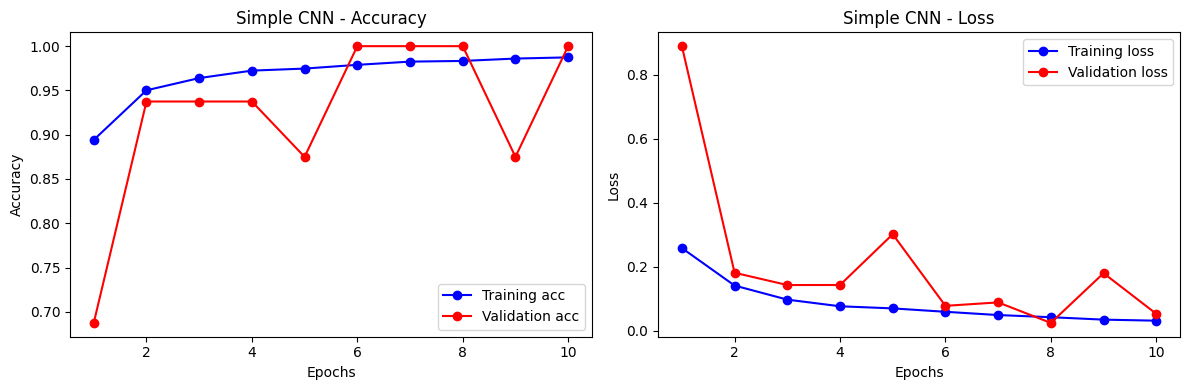

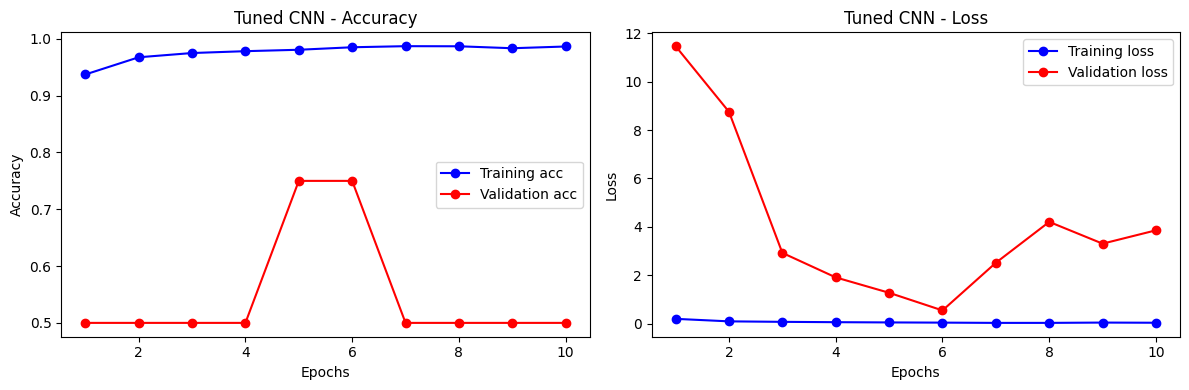

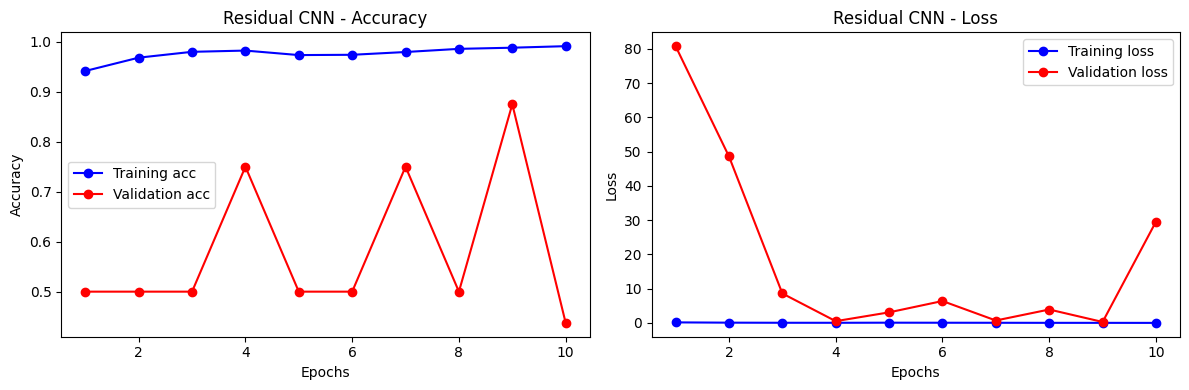

In [4]:
plot_learning_curves(history1['accuracy'], history1['val_accuracy'],
                     history1['loss'], history1['val_loss'], 'Simple CNN')
plot_learning_curves(history2['accuracy'], history2['val_accuracy'], 
                     history2['loss'], history2['val_loss'], 'Tuned CNN')
plot_learning_curves(history3['accuracy'], history3['val_accuracy'],
                     history3['loss'], history3['val_loss'], 'Residual CNN')

In [5]:
summarize_metrics(
    accuracies=history1['accuracy'], 
    losses=history1['loss'], 
    model_name='Simple CNN'
)
summarize_metrics(
    accuracies=history2['accuracy'], 
    losses=history2['loss'], 
    model_name='Tuned CNN'
)
summarize_metrics(
    accuracies=history3['accuracy'], 
    losses=history3['loss'], 
    model_name='Residual CNN'
)


Simple CNN:
  Acurácia média: 0.9674 ± 0.0267
  Perda média:    0.0866 ± 0.0653

Tuned CNN:
  Acurácia média: 0.9769 ± 0.0145
  Perda média:    0.0667 ± 0.0479

Residual CNN:
  Acurácia média: 0.9764 ± 0.0134
  Perda média:    0.0661 ± 0.0397


{'model': 'Residual CNN',
 'accuracy_mean': 0.9763803660869599,
 'accuracy_std': 0.013418823946227107,
 'loss_mean': 0.06614426299929618,
 'loss_std': 0.03965082818327824}

# Avaliando os modelos treinados com os dados de teste

20/20 [==============================] - 1s 64ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

      NORMAL       0.97      0.43      0.59       234
   PNEUMONIA       0.74      0.99      0.85       390

    accuracy                           0.78       624
   macro avg       0.86      0.71      0.72       624
weighted avg       0.83      0.78      0.75       624


Matriz de Confusão:
[[100 134]
 [  3 387]]

AUC-ROC: 0.9219


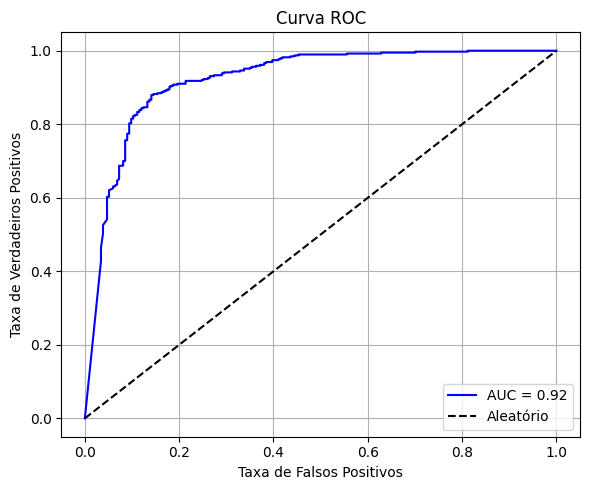

20/20 [==============================] - 2s 72ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

      NORMAL       1.00      0.00      0.01       234
   PNEUMONIA       0.63      1.00      0.77       390

    accuracy                           0.63       624
   macro avg       0.81      0.50      0.39       624
weighted avg       0.77      0.63      0.48       624


Matriz de Confusão:
[[  1 233]
 [  0 390]]

AUC-ROC: 0.8388


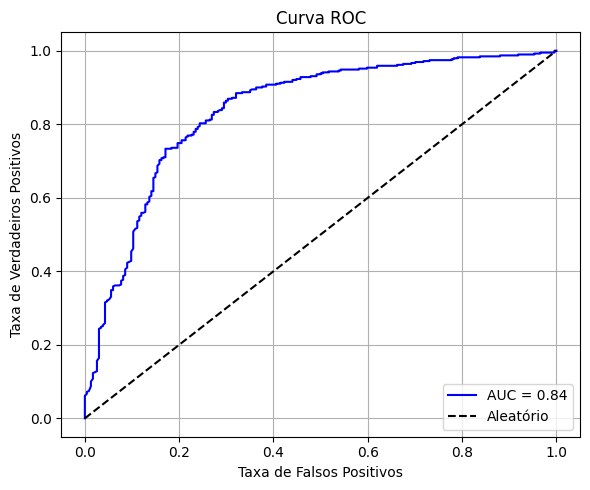

20/20 [==============================] - 2s 95ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

      NORMAL       0.41      0.53      0.46       234
   PNEUMONIA       0.66      0.55      0.60       390

    accuracy                           0.54       624
   macro avg       0.54      0.54      0.53       624
weighted avg       0.57      0.54      0.55       624


Matriz de Confusão:
[[123 111]
 [175 215]]

AUC-ROC: 0.5821


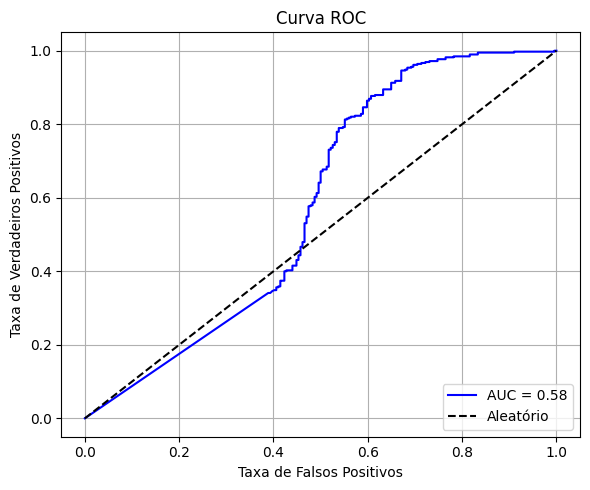

In [6]:
metrics1 = evaluate_model(model1, test_gen, class_names=['NORMAL', 'PNEUMONIA'])
metrics2 = evaluate_model(model2, test_gen, class_names=['NORMAL', 'PNEUMONIA'])
metrics3 = evaluate_model(model3, test_gen, class_names=['NORMAL', 'PNEUMONIA'])

# Visualização do comportamento da última camada dos modelos

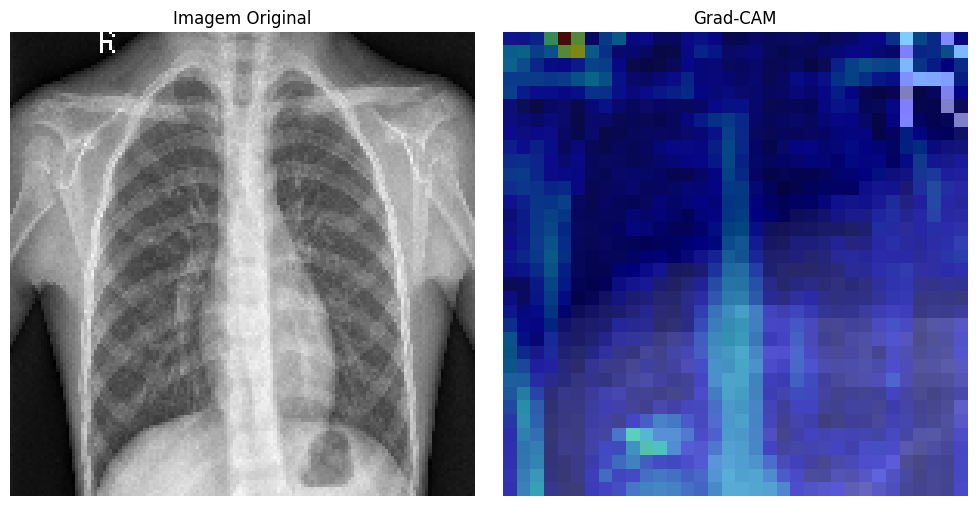

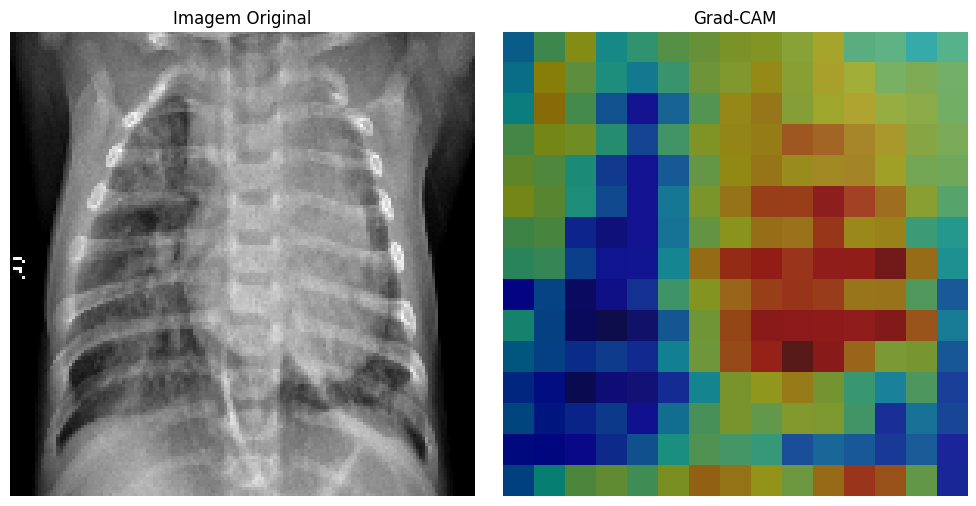

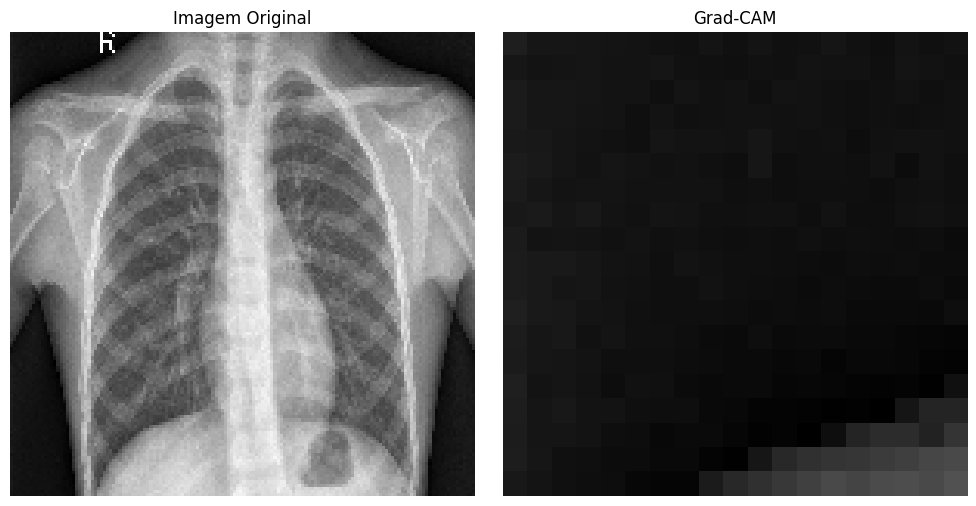

In [7]:
test_dir = '../data/test'
sample_normal = os.path.join(test_dir, 'NORMAL', os.listdir(os.path.join(test_dir, 'NORMAL'))[0])
sample_pneumonia = os.path.join(test_dir, 'PNEUMONIA', os.listdir(os.path.join(test_dir, 'PNEUMONIA'))[0])

last_conv_layer_name_m1 = get_last_conv_layer_name(model1)
last_conv_layer_name_m2 = get_last_conv_layer_name(model2)
last_conv_layer_name_m3 = get_last_conv_layer_name(model3)

apply_gradcam(model1, sample_normal, last_conv_layer_name=last_conv_layer_name_m1)
apply_gradcam(model2, sample_pneumonia, last_conv_layer_name=last_conv_layer_name_m2)
apply_gradcam(model3, sample_normal, last_conv_layer_name=last_conv_layer_name_m3)